In [1]:
import numpy as np
import math
from scipy.optimize import root
from sympy import *
from sympy import symbols , re , im, I
from sympy import chebyshevt
import matplotlib.pyplot as plt

In [2]:
# Filter number = 84
#therefore m = 4
def digitalspec(omega_s):
  omega = (omega_s*2*np.pi)
  return omega / 600000

In [34]:
bl = 62000
bh = 137000
blstop = 57000
bhstop = 142000

BL = digitalspec(62000)
BH = digitalspec(137000)
trans = digitalspec(5000)
BLstop = digitalspec(57000)
BHstop = digitalspec(142000)

In [4]:
print("BL: ", BL/np.pi, " BH: ", BH/np.pi, " trans: ", trans/np.pi, " BLstop: ", BLstop/np.pi, " BHstop: ", BHstop/np.pi)

BL:  0.20666666666666667  BH:  0.45666666666666667  trans:  0.016666666666666666  BLstop:  0.18999999999999997  BHstop:  0.4733333333333333


In [5]:
#Bilinear transformaiton
def bilinear(omegaC):
  return math.tan(omegaC/2)

In [6]:
OBL = bilinear(BL)
OBH = bilinear(BH)
Otrans = bilinear(trans)
OBLstop = bilinear(BLstop)
OBHstop = bilinear(BHstop)
omega_o = np.power(OBL*OBH, 0.5)
B = OBH - OBL

In [7]:
print("OBL: ", OBL, " OBH: ", OBH, " Otrans: ", Otrans, " OBLstop: ", OBLstop, " OBHstop: ", OBHstop, " B: ", B, " Omega_o: ", omega_o)

OBL:  0.33653718137202315  OBH:  0.8723556007494593  Otrans:  0.02618592156918693  OBLstop:  0.30764016965989827  OBHstop:  0.9195471379070398  B:  0.5358184193774361  Omega_o:  0.5418303194085036


In [8]:
def lowfy(omega): 
  omegaL = (np.power(omega, 2) - np.power(omega_o,2)) / (omega*B)
  return omegaL

In [9]:
BL_low = lowfy(OBL)
BH_low = lowfy(OBH)
trans_low = lowfy(Otrans)
BLstop_low = lowfy(OBLstop)
BHstop_low = lowfy(OBHstop)

Omega_LP = 1
Omega_LS = min(-BLstop_low, BHstop_low)

In [10]:
print("OBL: ", BL_low, " OBH: ", BH_low, " OBLstop: ", BLstop_low, " OBHstop: ", BHstop_low, "Omega_LP: ", Omega_LP, " Omega_LS: ", Omega_LS)

OBL:  -1.0000000000000002  OBH:  1.0  OBLstop:  -1.2068581819899737  OBHstop:  1.1203071065309465 Omega_LP:  1  Omega_LS:  1.1203071065309465


In [11]:
D_1 = 1 / (np.power((1-0.15), 2)) - 1
D_2 = 1 / np.power(0.15, 2) - 1

Values of delta 1 and delta 2

In [12]:
#Calculation for Nmin and Epsilon
N = np.arccosh(np.power(D_2 / D_1, 0.5)) / np.arccosh(Omega_LS / Omega_LP)
N_min = 7
Eps = np.sqrt(D_1)

In [13]:
print("Minimun value of N is", N, "Therefore we choose N as ", N_min)

Minimun value of N is 6.289681182584583 Therefore we choose N as  7


In [14]:
def chevy(N):
  return chebyshevt(N, s/I) #Gives chebyshev polynomial as the output

In [15]:
# s = symbols('s')
# eqn = 1 + D_1*chevy(N_min)**2
# poles = solve(eqn)
# poles #Poles obtained of which we will be using only the left half plain ones

Ak = [(k + 0.5)*np.pi/ N_min for k in range(N_min, 2*N_min)]
Bk = [1 / N_min * np.arcsinh(1/Eps) for k in range(N_min, 2*N_min)]

poles = Omega_LP * (np.sin(Ak)*np.sinh(Bk) + 1j * np.cos(Ak)*np.cosh(Bk))
poles

array([-0.04014613-9.90667614e-01j, -0.11248696-7.94453744e-01j,
       -0.16254837-4.40888566e-01j, -0.18041508-1.86662712e-16j,
       -0.16254837+4.40888566e-01j, -0.11248696+7.94453744e-01j,
       -0.04014613+9.90667614e-01j])

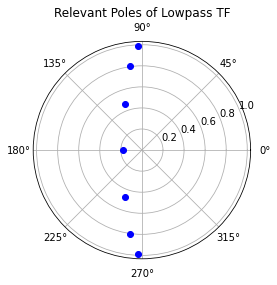

In [16]:
plt.polar(np.angle(poles), np.abs(poles), 'bo')
plt.title('Relevant Poles of Lowpass TF')
plt.savefig("poles_lowpass")

In [17]:
def expr(s):
  return np.prod(poles) / np.prod([s - poles])

In [18]:
#From the poles we can now design the analog low pass filter 
s = symbols('s')
exp = expr(s)
eqn_t = (s**2 + omega_o**2) / (B*s)
eqn_bp = exp.subs(s, eqn_t)
eqn_bp

(-0.0252120092621757 - 3.62123525610158e-17*I)/((0.0401461315037901 + 0.990667614388819*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.0401461315037903 - 0.990667614388819*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.112486960807053 - 0.79445374361815*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.112486960807053 + 0.79445374361815*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.162548367960439 + 0.440888565588148*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.162548367960439 - 0.440888565588148*I + 1.86630388922033*(s**2 + 0.293580095030321)/s)*(0.180415077314352 + 1.86662712363796e-16*I + 1.86630388922033*(s**2 + 0.293580095030321)/s))

In [19]:
delta_1 = 1 - np.power(D_1 + 1, -0.5)
delta_2 = np.power(D_2 - 1, -0.5)

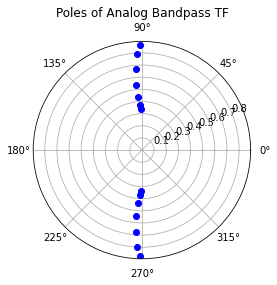

In [20]:
poles_bp = solve(1/eqn_bp)
poles_bp = np.fromiter(poles_bp, dtype = complex)
plt.polar(np.angle(poles_bp), np.abs(poles_bp), 'bo')
plt.title('Poles of Analog Bandpass TF')
plt.savefig("Poles_bp")

In [21]:
#Now converting to descrete time transfer function 
z = symbols('z')
a = symbols('a')
z_inv = symbols('z^{-1}')
inv = 1 / a
eqn_z = (1 - 1 / z) / (1 + 1 / z)
eqn_ztrans = eqn_bp.subs(s, eqn_z).subs(z, inv).subs(a, z_inv)
eqn_ztrans

(-0.0252120092621757 - 3.62123525610158e-17*I)/((0.0401461315037901 + 0.990667614388819*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.0401461315037903 - 0.990667614388819*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.112486960807053 - 0.79445374361815*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.112486960807053 + 0.79445374361815*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.162548367960439 + 0.440888565588148*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.162548367960439 - 0.440888565588148*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)**2 + 0.293580095030321)/(1 - z^{-1}))*(0.180415077314352 + 1.86662712363796e-16*I + 1.86630388922033*(z^{-1} + 1)*((1 - z^{-1})**2/(z^{-1} + 1)*

In [22]:
num, den = eqn_ztrans.as_numer_denom()
print(latex(expand(den)))
# expand(num)

461.404456460953 \left(z^{-1}\right)^{21} - 1.61049500889819 \cdot 10^{-13} i \left(z^{-1}\right)^{21} - 173.093314501077 \left(z^{-1}\right)^{20} - 9.66427651872398 \cdot 10^{-14} i \left(z^{-1}\right)^{20} - 233.590871479053 \left(z^{-1}\right)^{19} + 2.37643930876021 \cdot 10^{-13} i \left(z^{-1}\right)^{19} + 2842.27305876781 \left(z^{-1}\right)^{18} - 6.71492194688749 \cdot 10^{-13} i \left(z^{-1}\right)^{18} - 1212.41127249349 \left(z^{-1}\right)^{17} - 5.6614624374733 \cdot 10^{-13} i \left(z^{-1}\right)^{17} - 803.497825995003 \left(z^{-1}\right)^{16} + 1.10746542027395 \cdot 10^{-12} i \left(z^{-1}\right)^{16} + 8046.32066101662 \left(z^{-1}\right)^{15} - 1.33056176914832 \cdot 10^{-12} i \left(z^{-1}\right)^{15} - 3728.11909618479 \left(z^{-1}\right)^{14} - 1.55936233397121 \cdot 10^{-12} i \left(z^{-1}\right)^{14} - 934.538053613733 \left(z^{-1}\right)^{13} + 2.54753696510892 \cdot 10^{-12} i \left(z^{-1}\right)^{13} + 13394.697419938 \left(z^{-1}\right)^{12} - 1.41074533865

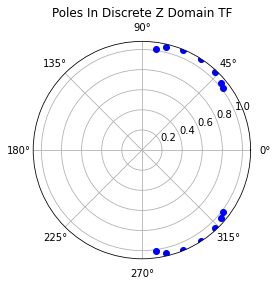

In [23]:
poles_z = solve(1/eqn_ztrans)
poles_z = np.fromiter(poles_z, dtype = complex)
plt.polar(np.angle(poles_z), np.abs(poles_z), 'bo')
plt.title('Poles In Discrete Z Domain TF')
plt.savefig('Poles_Z')

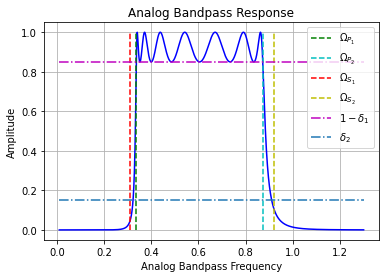

In [24]:
#Plotting the bandpass filter frequency response
f = lambdify(s, eqn_bp, 'numpy')
a = np.linspace(0.01, 1.3, 1500)
y = abs(f(a*(1j)))
hlimit = [min(a), max(a)]
vlimit = [min(y), max(y)]
plt.plot(a,y, color = 'b')
plt.plot([OBL, OBL], vlimit, linestyle = '--', color = 'g', label = '$\Omega_{P_1}$')
plt.plot([OBH, OBH], vlimit, linestyle = '--', color = 'c', label = '$\Omega_{P_2}$')
plt.plot([OBLstop, OBLstop], vlimit, linestyle = '--', color = 'r', label = '$\Omega_{S_1}$')
plt.plot([OBHstop, OBHstop], vlimit, linestyle = '--', color = 'y', label = '$\Omega_{S_2}$')
plt.plot(hlimit, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
plt.plot(hlimit, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Analog Bandpass Response')
plt.xlabel('Analog Bandpass Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Bandpass")
plt.show()

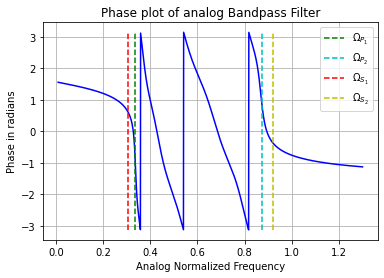

In [25]:
yphase = np.angle(f(a*1j))
vphase = [min(yphase), max(yphase)]
plt.plot(a, yphase, c = 'b')
plt.plot([OBL, OBL], vphase, linestyle = '--', color = 'g', label = '$\Omega_{P_1}$')
plt.plot([OBH, OBH], vphase, linestyle = '--', color = 'c', label = '$\Omega_{P_2}$')
plt.plot([OBLstop, OBLstop], vphase, linestyle = '--', color = 'r', label = '$\Omega_{S_1}$')
plt.plot([OBHstop, OBHstop], vphase, linestyle = '--', color = 'y', label = '$\Omega_{S_2}$')
plt.legend(loc = 'upper right')
plt.grid()
plt.title('Phase plot of analog Bandpass Filter')
plt.ylabel('Phase in radians')
plt.xlabel('Analog Normalized Frequency')
plt.savefig('PhaseBP')

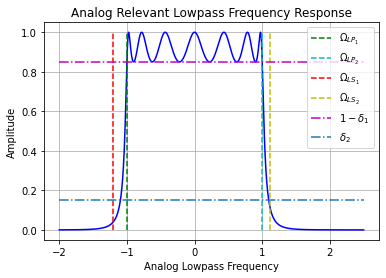

In [39]:
#Plotting for lowpass
fL = lambdify(s, exp, 'numpy')
b = np.linspace(-2.0, 2.5, 1500)
yL = abs(fL(b*(1j)))
hlimitL = [min(b), max(b)]
vlimitL = [min(yL), max(yL)]
plt.plot(b,yL, c = 'b')
plt.plot([BL_low, BL_low], vlimitL, linestyle = '--', color = 'g', label = '$\Omega_{LP_1}$')
plt.plot([BH_low, BH_low], vlimitL, linestyle = '--', color = 'c', label = '$\Omega_{LP_2}$')
plt.plot([BLstop_low, BLstop_low], vlimitL, linestyle = '--', color = 'r', label = '$\Omega_{LS_1}$')
plt.plot([BHstop_low, BHstop_low], vlimitL, linestyle = '--', color = 'y', label = '$\Omega_{LS_2}$')
plt.plot(hlimitL, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
plt.plot(hlimitL, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Analog Relevant Lowpass Frequency Response')
plt.xlabel('Analog Lowpass Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Lowpass")
plt.show()

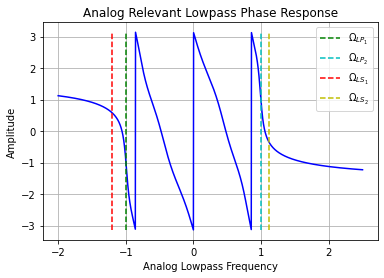

In [38]:
#Plotting for lowpass
fL = lambdify(s, exp, 'numpy')
b = np.linspace(-2.0, 2.5, 1500)
yL = np.angle(fL(b*(1j)))
hlimitL = [min(b), max(b)]
vlimitL = [min(yL), max(yL)]
plt.plot(b,yL, c = 'b')
plt.plot([BL_low, BL_low], vlimitL, linestyle = '--', color = 'g', label = '$\Omega_{LP_1}$')
plt.plot([BH_low, BH_low], vlimitL, linestyle = '--', color = 'c', label = '$\Omega_{LP_2}$')
plt.plot([BLstop_low, BLstop_low], vlimitL, linestyle = '--', color = 'r', label = '$\Omega_{LS_1}$')
plt.plot([BHstop_low, BHstop_low], vlimitL, linestyle = '--', color = 'y', label = '$\Omega_{LS_2}$')
# plt.plot(hlimitL, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
# plt.plot(hlimitL, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Analog Relevant Lowpass Phase Response')
plt.xlabel('Analog Lowpass Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("LpPhase")
plt.show()

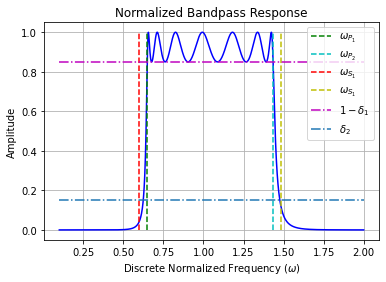

In [27]:
#Plotting for Z-bandpass
fZ = lambdify(z_inv, eqn_ztrans, 'numpy')
Z = np.linspace(0.1, 2, 1500)
yZ = abs(fZ(np.exp(Z*1j)))
hlimitZ = [min(Z), max(Z)]
vlimitZ = [min(yZ), max(yZ)]
plt.plot(Z,yZ, c = 'b')
plt.plot([BL, BL], vlimitZ, linestyle = '--', color = 'g', label = '$\omega_{P_1}$')
plt.plot([BH, BH], vlimitZ, linestyle = '--', color = 'c', label = '$\omega_{P_2}$')
plt.plot([BLstop, BLstop], vlimitZ, linestyle = '--', color = 'r', label = '$\omega_{S_1}$')
plt.plot([BHstop, BHstop], vlimitZ, linestyle = '--', color = 'y', label = '$\omega_{S_1}$')
plt.plot(hlimitZ, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
plt.plot(hlimitZ, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Normalized Bandpass Response')
plt.xlabel('Discrete Normalized Frequency ($\omega$)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Z")

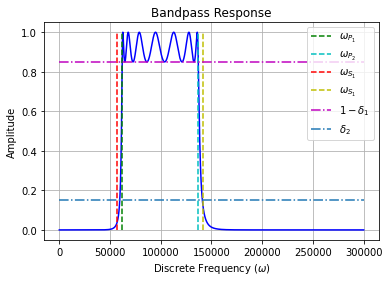

In [43]:
#Plotting for Z-bandpass
fZ = lambdify(z_inv, eqn_ztrans, 'numpy')
z = np.linspace(0.1, 300000, 15000)
yz = abs(fZ(np.exp(Z*1j*2*np.pi/600000)))
hlimitz = [min(z), max(z)]
vlimitz = [min(yz), max(yz)]
plt.plot(z,yz, c = 'b')
plt.plot([bl, bl], vlimitz, linestyle = '--', color = 'g', label = '$\omega_{P_1}$')
plt.plot([bh, bh], vlimitz, linestyle = '--', color = 'c', label = '$\omega_{P_2}$')
plt.plot([blstop, blstop], vlimitz, linestyle = '--', color = 'r', label = '$\omega_{S_1}$')
plt.plot([bhstop, bhstop], vlimitz, linestyle = '--', color = 'y', label = '$\omega_{S_1}$')
plt.plot(hlimitz, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
plt.plot(hlimitz, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Bandpass Response')
plt.xlabel('Discrete Frequency ($\omega$)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Zreal")

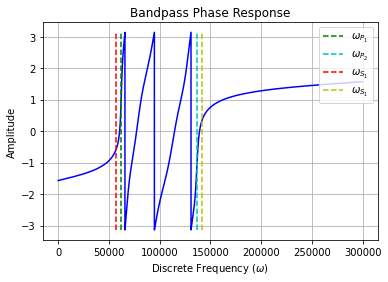

In [44]:
#Plotting for Z-bandpass
fZ = lambdify(z_inv, eqn_ztrans, 'numpy')
z = np.linspace(0.1, 300000, 15000)
yz = np.angle(fZ(np.exp(Z*1j*2*np.pi/600000)))
hlimitz = [min(z), max(z)]
vlimitz = [min(yz), max(yz)]
plt.plot(Z,yz, c = 'b')
plt.plot([bl, bl], vlimitz, linestyle = '--', color = 'g', label = '$\omega_{P_1}$')
plt.plot([bh, bh], vlimitz, linestyle = '--', color = 'c', label = '$\omega_{P_2}$')
plt.plot([blstop, blstop], vlimitz, linestyle = '--', color = 'r', label = '$\omega_{S_1}$')
plt.plot([bhstop, bhstop], vlimitz, linestyle = '--', color = 'y', label = '$\omega_{S_1}$')
# plt.plot(hlimitZ, [1 - delta_1, 1 - delta_1], linestyle = '-.', color = 'm', label = '$1 - \delta_1$')
# plt.plot(hlimitZ, [delta_2, delta_2], linestyle = '-.', label = '$\delta_2$')
plt.legend(loc = 'upper right')
plt.title('Bandpass Phase Response')
plt.xlabel('Discrete Frequency ($\omega$)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Zphase")